<a id='EDA'></a>
# 4. Exploratory Data Analysis
<a href='#top'>back to top</a>

t-nse plot
identify outliers
correlation matrix

Check response variable's distribution

After Removing 0 transaction revenues and take log transformation, the distribution is with moderate skewness.

In [5]:
Path = "train.csv"
df = pd.read_csv(Path)

C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
names_y = "log_transactionRevenue"
ig_cols = ['fullVisitorId','visitId','raw_networkDomain','transactionRevenue','raw_operatingSystem','raw_browser',
          'raw_country','raw_region','raw_city','pre_visitStartTime','raw_visitStartTime']

In [127]:
given_types = {'channelGrouping':'enum', 'fullVisitorId':'numeric', 'visitId':'numeric', 'visitStartTime':'enum', 
               'hits':'numeric','pageviews':'numeric', 'timeOnSite':'numeric', 'newVisits':'enum', 
               'sessionQualityDim':'numeric','transactionRevenue':'numeric', 'bounces':'enum', 'week':'enum', 
               'day_of_week':'enum', 'continent':'enum','subContinent':'enum', 'raw_country':'enum', 'country':'numeric',
               'raw_region':'enum','region':'numeric','raw_city':'enum', 'city':'numeric', 
               'raw_networkDomain':'enum', 'raw_browser':'enum','browser':'numeric','operatingSystem':"numeric",
               'deviceCategory':'enum', 'value':'enum','networkDomain':'numeric',"log_transactionRevenue":"numeric",
              "raw_operatingSystem":"enum",'pre_visitStartTime':"time",'diff_lastVisitTime':"numeric",
              "raw_visitStartTime":"time","nvisits":"numeric"}

In [128]:
names_x = list(given_types.keys())
names_x.remove("log_transactionRevenue")              
names_x = [i for i in names_x if i not in ig_cols ]

In [129]:
cat = []
numeric = []
for name in names_x:
    if given_types[name] == 'enum':
        cat.append(name)
    elif given_types[name] == 'numeric':
        numeric.append(name)
numeric.remove('operatingSystem')
numeric.remove('networkDomain')
numeric.remove('country')
numeric.remove('region')
numeric.remove('city')
numeric.remove('browser')
print(cat)
print(numeric)

['channelGrouping', 'visitStartTime', 'newVisits', 'bounces', 'week', 'day_of_week', 'continent', 'subContinent', 'deviceCategory', 'value']
['hits', 'pageviews', 'timeOnSite', 'sessionQualityDim', 'diff_lastVisitTime', 'nvisits']


## Distributions of Categorical Variables

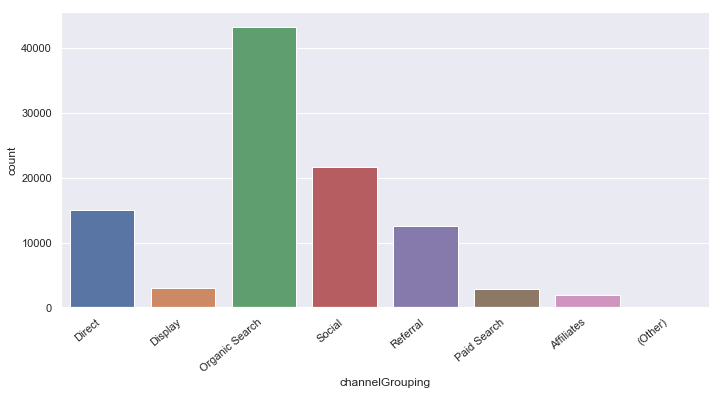

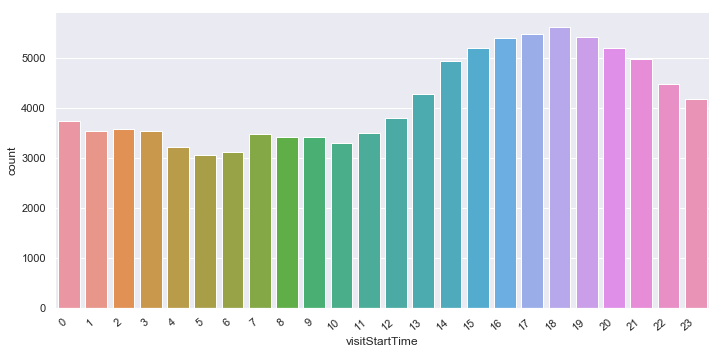

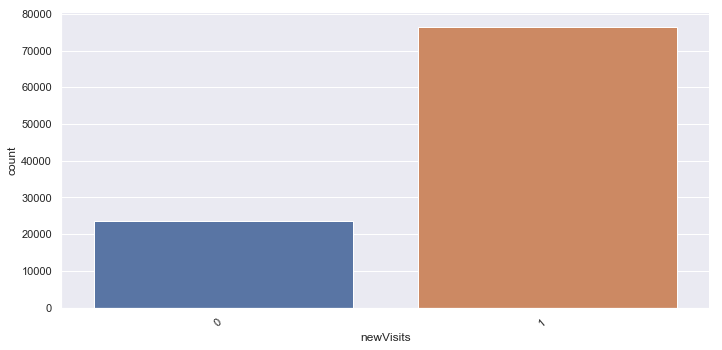

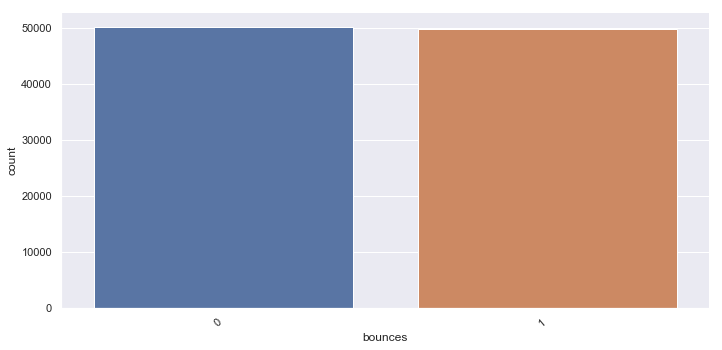

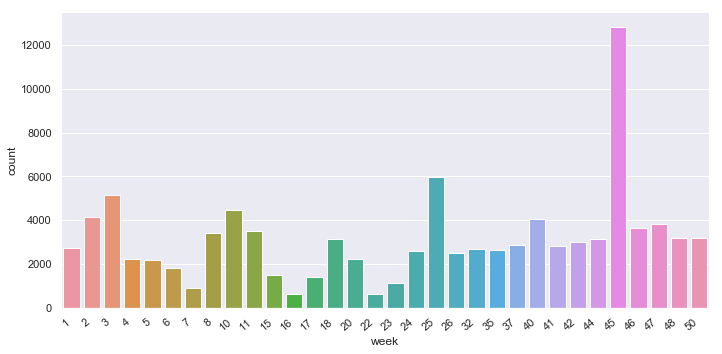

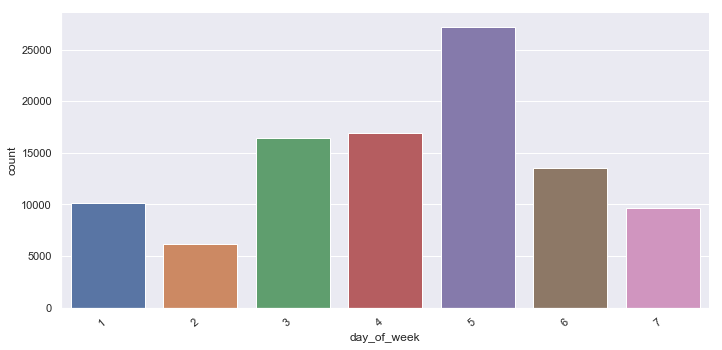

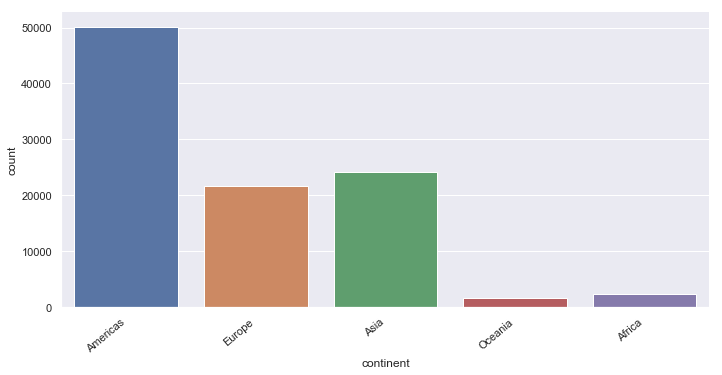

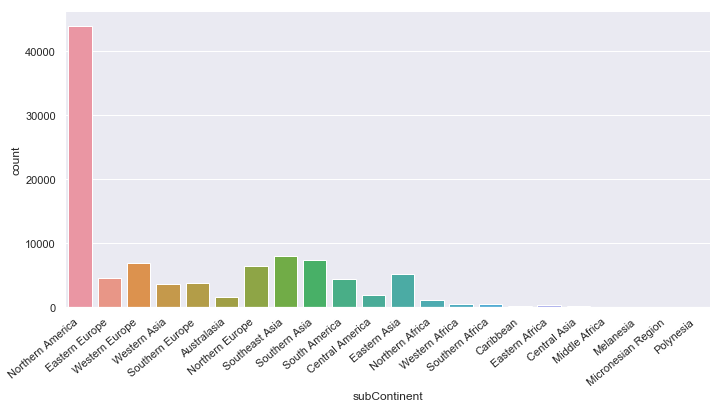

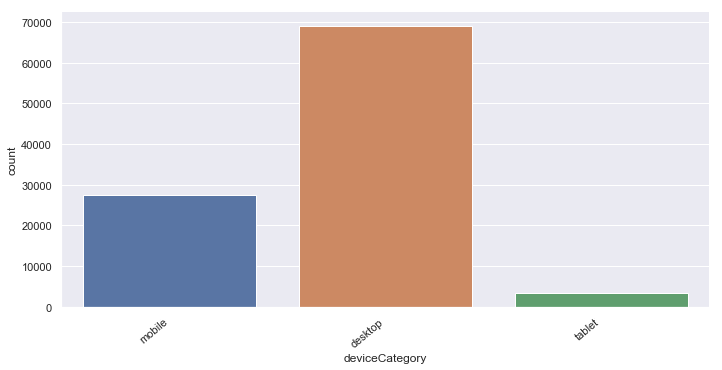

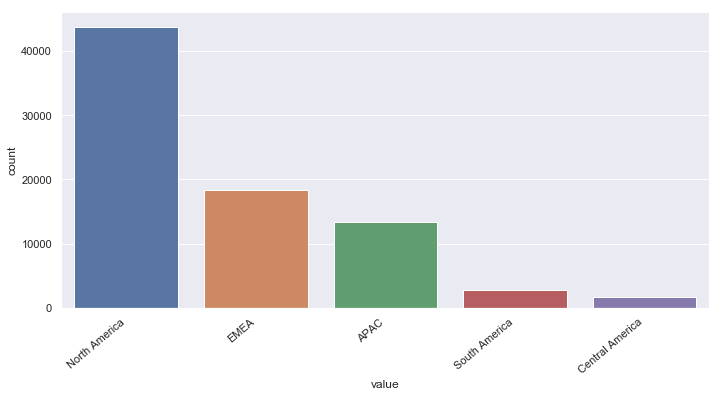

In [431]:
long_cat = []
for name in cat:
    if len(df[name].unique())<53:
        g = seaborn.catplot(x=name,kind='count',data=df,aspect=2)
        g.set_xticklabels(rotation=40,ha='right')
        g.savefig(name+"_histogram.png")
    else:
        long_cat.append(name)

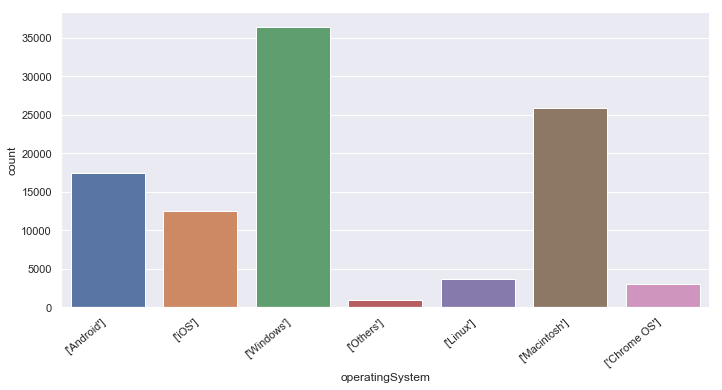

In [432]:
g = seaborn.catplot(x='operatingSystem',kind='count',data=df,aspect=2)
g.set_xticklabels(labels=operatingSystem_dict.values(),rotation=40,ha='right')   
g.savefig("operatingSystem_histogram.png")

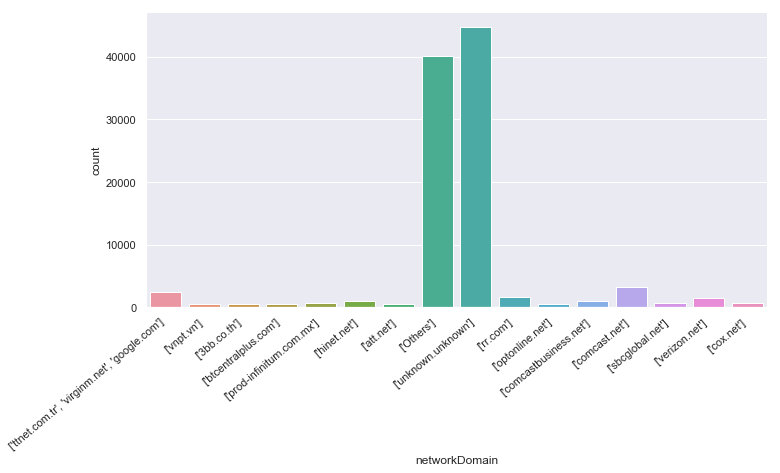

In [433]:
g = seaborn.catplot(x='networkDomain',kind='count',data=df,aspect=2)
g.set_xticklabels(labels=networkDomain_dict.values(),rotation=40,ha='right')   
g.savefig("networkDomain_histogram.png")

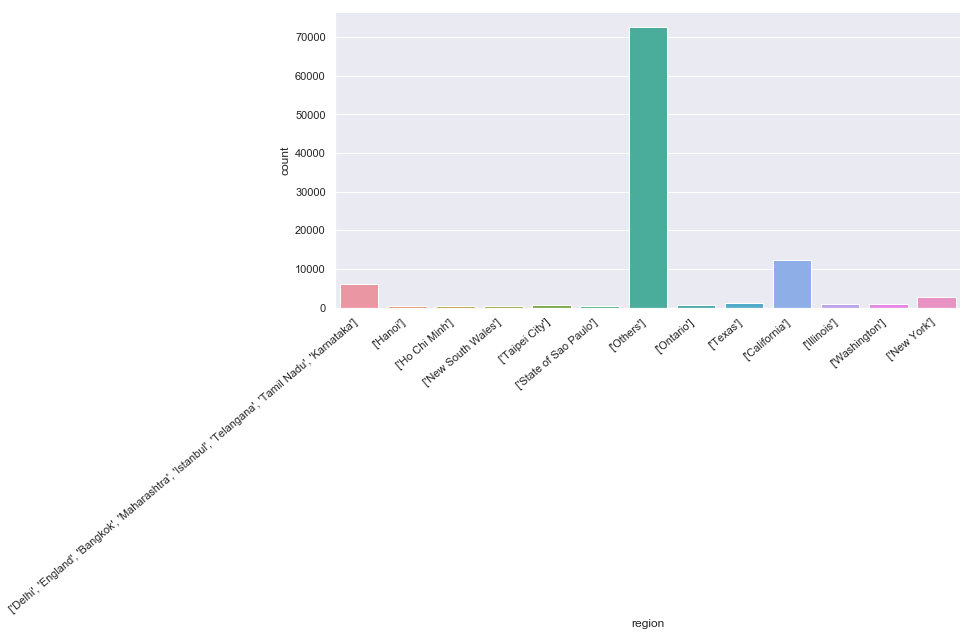

In [434]:
g = seaborn.catplot(x='region',kind='count',data=df,aspect=2)
g.set_xticklabels(labels=region_dict.values(),rotation=40,ha='right')   
g.savefig("region_histogram.png")

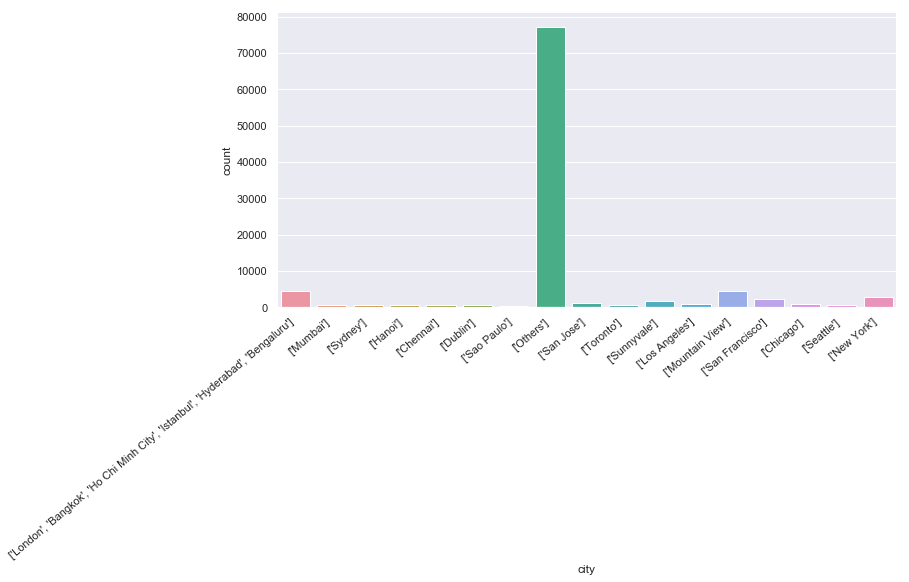

In [435]:
g = seaborn.catplot(x='city',kind='count',data=df,aspect=2)
g.set_xticklabels(labels=city_dict.values(),rotation=40,ha='right')   
g.savefig("city_histogram.png")

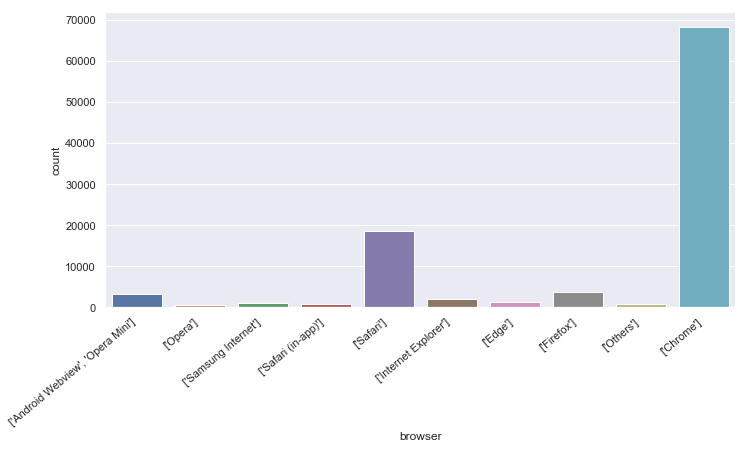

In [436]:
g = seaborn.catplot(x='browser',kind='count',data=df,aspect=2)
g.set_xticklabels(labels=browser_dict.values(),rotation=40,ha='right')   
g.savefig("browser_histogram.png")

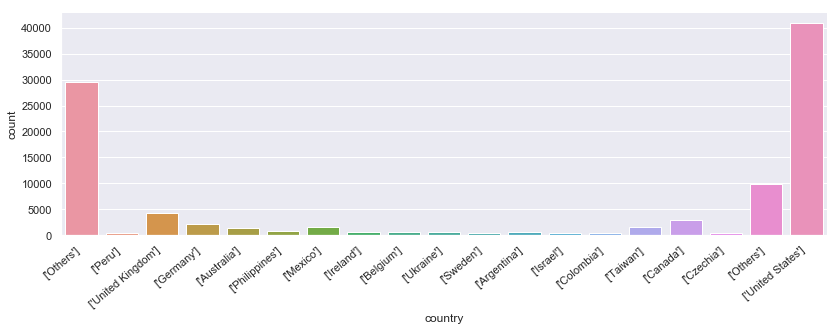

In [437]:
g = seaborn.catplot(x='country',kind='count',data=df,aspect=3,height=4)
g.set_xticklabels(labels=country_dict.values(),rotation=40,ha='right') 
g.savefig("country_histogram.png")

In [130]:
for name in numeric:
    g = seaborn.kdeplot(df[name])
    plt.savefig(name+"_histogram.png")
    plt.close()

C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


In [183]:
name = "log_transactionRevenue"
g = seaborn.distplot(df[name])
plt.savefig(name+"_histogram.png")
plt.close()

C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [182]:
name = "transactionRevenue"
g = seaborn.distplot(df[name])
plt.savefig(name+"_histogram.png")
plt.close()

C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# Pair Plot of Numeric Variables

In [131]:
numeric

['hits',
 'pageviews',
 'timeOnSite',
 'sessionQualityDim',
 'diff_lastVisitTime',
 'nvisits']

In [132]:
df[numeric].dtypes

hits                   object
pageviews               int64
timeOnSite             object
sessionQualityDim      object
diff_lastVisitTime    float64
nvisits                 int64
dtype: object

C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


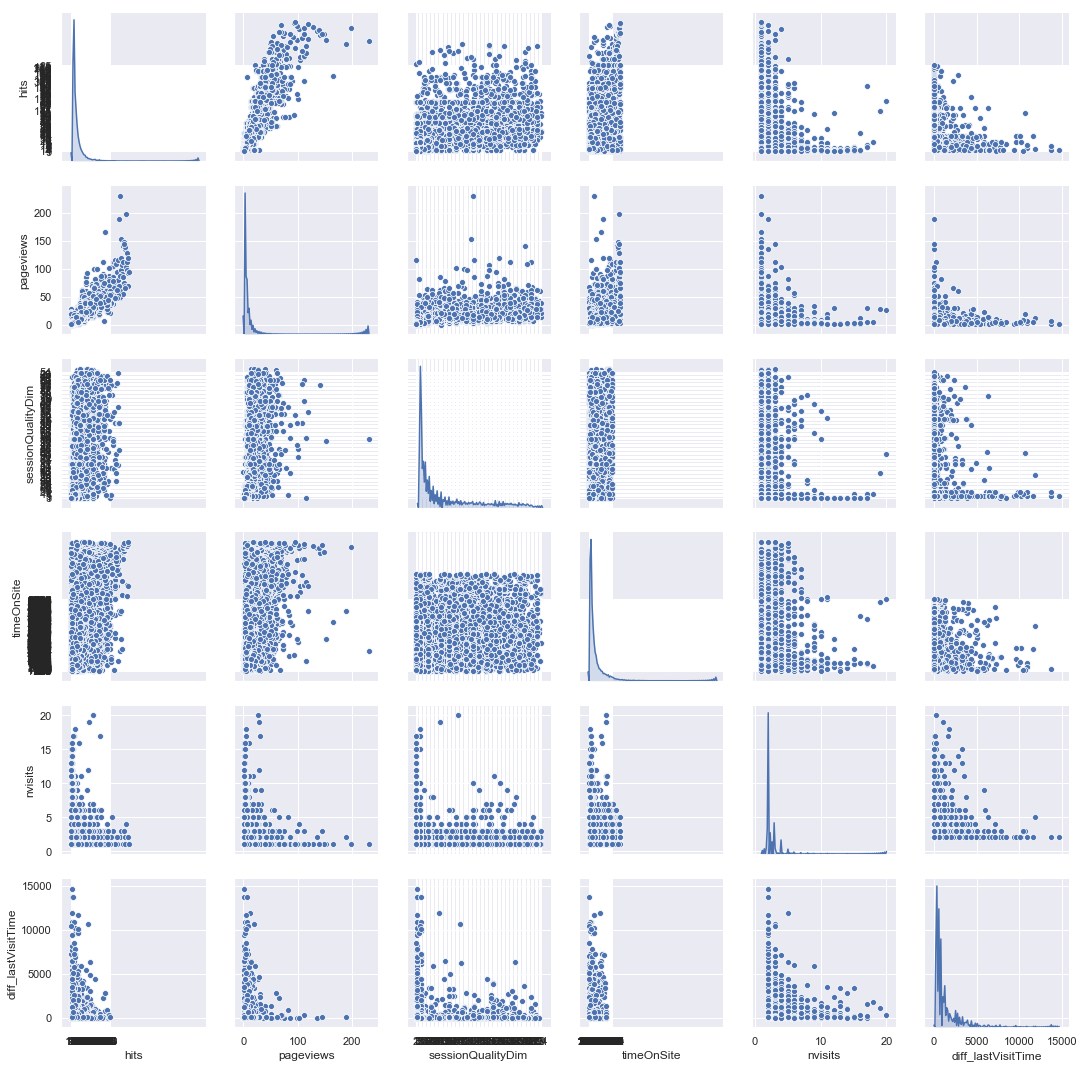

In [133]:
seaborn.pairplot(df.loc[:,df.columns.isin(numeric)],height=2.5,diag_kind='kde')

In [16]:
df[df.pageviews==df.hits].shape

(82088, 34)

In [17]:
df.shape

(100000, 34)

C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\XuL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


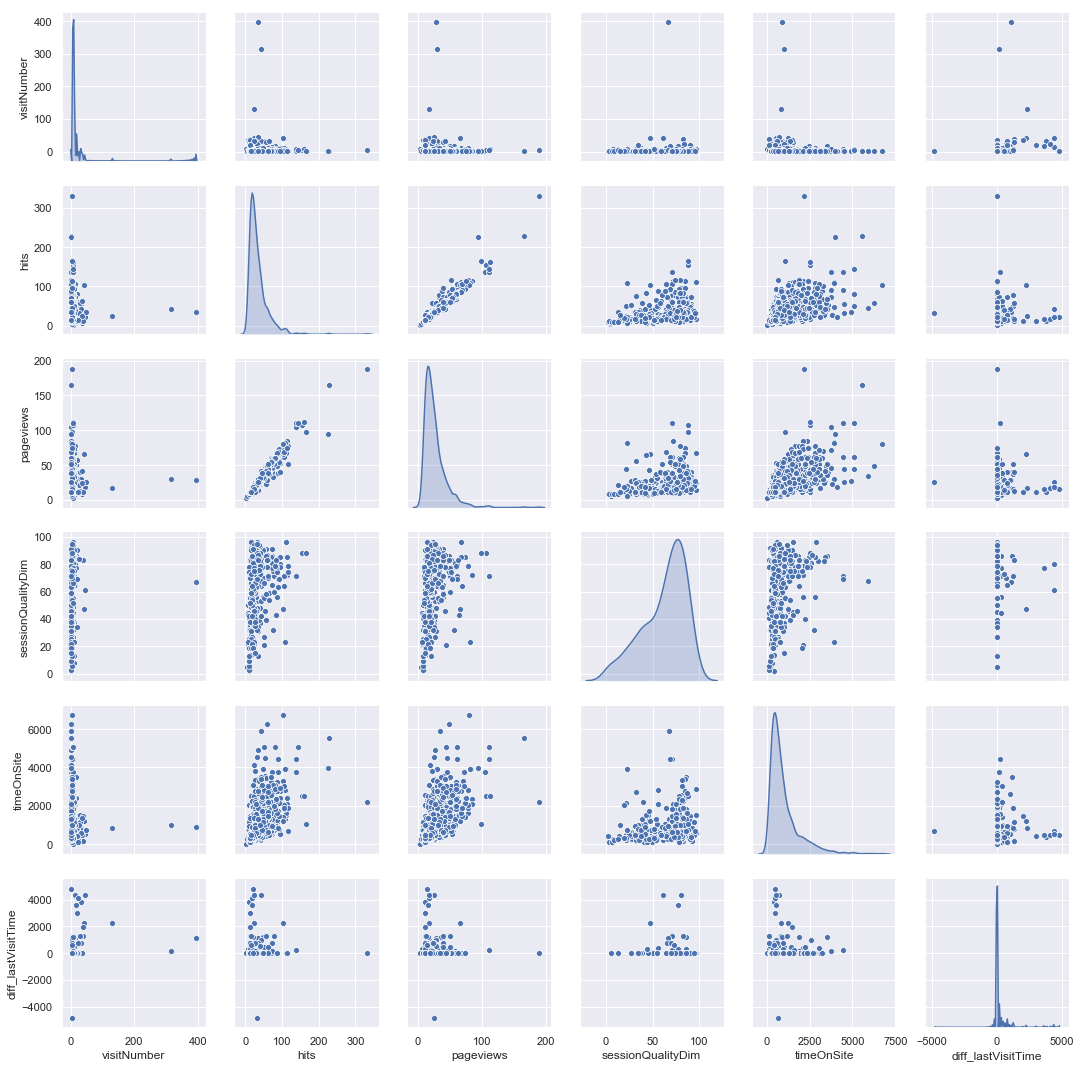

In [18]:
seaborn.pairplot(df.loc[df.log_transactionRevenue!=0,df.columns.isin(numeric)],height=2.5,diag_kind='kde')

Comments:
Numeric features are highly skewed
Hits and pageviews are highly correlated

Q: How to interpret targe value encoding for Cat Variables for Variance Importance Plot?

A: Not acurate; biased towards high cardinality

Q:How to group cat variables with high cardinality for visualization?

A: Use target encoding and grouping sample size < n to be "Others" category.




Q:PDF Box Interpret partial dependence plot?

Q: How to identify and remove outliers?

Grid Search